In [7]:
import glob
import sys
import os
import errno
import pandas as pd

In [8]:
path = "SentenceCorpus/labeled_articles"
list_ = []
files = glob.glob(path + "/*.txt")
col = ['Labels', 'Words']
for name in files:
    df = pd.read_csv(name, sep ="\t", names = col,header = None)
    df = df[~df['Labels'].isin(['### abstract ###'])]
    df = df[~df['Labels'].isin(['### introduction ###'])]
    df = df[~df['Words'].isin(['NaN'])]
    list_.append(df)

In [5]:
frame = pd.DataFrame()
frame = pd.concat(list_)

In [6]:
print(frame)

   Labels                                              Words
0    MISC  The Minimum Description Length principle for o...
1    MISC  If the underlying model class is discrete, the...
2    MISC  For MDL, in general one can only have loss bou...
3    AIMX  We show that this is even the case if the mode...
4    OWNX  We derive a new upper bound on the prediction ...
5    OWNX  This implies a small bound (comparable to the ...
6    OWNX  We discuss the application to Machine Learning...
7    MISC  ``Bayes mixture", ``Solomonoff induction", ``m...
8    CONT  In many cases however, the Bayes mixture is co...
9    MISC  The MDL or MAP (maximum a posteriori) estimato...
10   MISC  In practice, the MDL estimator is usually bein...
11   MISC  How good are the predictions by Bayes mixtures...
12   MISC         This question has attracted much attention
13   MISC  In many cases, an important quality measure is...
14   MISC  In particular the square loss is often considered
15   MISC  Assume that t

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
stop = stopwords.words('english')
frame.columns = frame.columns.str.strip()
frame['Words'] = frame['Words'].str.replace('[^\w\s\t]','')
#Word tokenize
frame["Words"] = frame["Words"].fillna("").map(word_tokenize)
print (frame['Words'])

0     [The, Minimum, Description, Length, principle,...
1     [If, the, underlying, model, class, is, discre...
2     [For, MDL, in, general, one, can, only, have, ...
3     [We, show, that, this, is, even, the, case, if...
4     [We, derive, a, new, upper, bound, on, the, pr...
5     [This, implies, a, small, bound, comparable, t...
6     [We, discuss, the, application, to, Machine, L...
7     [Bayes, mixture, Solomonoff, induction, margin...
8     [In, many, cases, however, the, Bayes, mixture...
9     [The, MDL, or, MAP, maximum, a, posteriori, es...
10    [In, practice, the, MDL, estimator, is, usuall...
11    [How, good, are, the, predictions, by, Bayes, ...
12    [This, question, has, attracted, much, attention]
13    [In, many, cases, an, important, quality, meas...
14    [In, particular, the, square, loss, is, often,...
15    [Assume, that, the, outcome, space, is, finite...
16    [Then, for, Bayes, mixture, prediction, the, c...
17    [This, corresponds, to, an, instantaneous,

In [6]:
frame['Words'] = frame['Words'].apply(lambda x: [item for item in x if item not in stop])

In [7]:
frame['Words']=[" ".join(Words) for Words in frame['Words'].values]

In [8]:
from sklearn.model_selection import train_test_split
#train test split dividing train test in 80% and 20%
X_train, X_test, Y_train, Y_test = train_test_split(frame['Words'], frame['Labels'], test_size=0.2,random_state=50)
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
train_mat = vectorizer.transform(X_train)
print (train_mat.shape)
test_mat = vectorizer.transform(X_test)
print (test_mat.shape)

(2437, 4117)
(610, 4117)


In [9]:
#Determining tf-idf
tfidf = TfidfTransformer()
tfidf.fit(train_mat)
train_tfmat = tfidf.transform(train_mat)
print (train_tfmat.shape)
test_tfmat = tfidf.transform(test_mat)
print (test_tfmat.shape)

(2437, 4117)
(610, 4117)


In [10]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X = train_tfmat.toarray(), y = Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [11]:
predict = clf.predict(test_tfmat.toarray())


Accuracy of Naive Bayes:

0.7950819672131147

Confusion Matrix: 
 [[  0   0   0  17  17   0]
 [  0   0   0   6   6   0]
 [  0   0   0  35   4   0]
 [  0   0   0 357   6   0]
 [  0   0   0  33 128   0]
 [  0   0   0   0   1   0]]


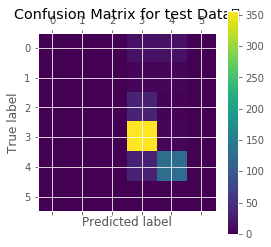

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import style
import matplotlib.pyplot as plt
%matplotlib inline
style.use('ggplot')

accuracy = accuracy_score(Y_test, predict)
#Accuracy
print('\nAccuracy of Naive Bayes:\n')
print (accuracy)
conf_mat = confusion_matrix(Y_test, predict)
print('\nConfusion Matrix: \n',conf_mat)
plt.matshow(conf_mat)
plt.title('Confusion Matrix for test Data\t')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf_1 = KNeighborsClassifier(n_neighbors=5,algorithm='auto',n_jobs=-1)
clf_1.fit(X = train_tfmat.toarray(), y = Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
predict_1 = clf_1.predict(test_tfmat.toarray())


Accuracy of KNN:

0.7360655737704918

Confusion Matrix: 
 [[ 17   2   1   1   9   4   0]
 [  0   0   0   0   0   0   0]
 [  1   0   2   0   3   6   0]
 [  2   0   1  13  21   2   0]
 [ 13   0   5  16 313  16   0]
 [ 10   0   3   3  41 104   0]
 [  0   0   0   0   0   1   0]]


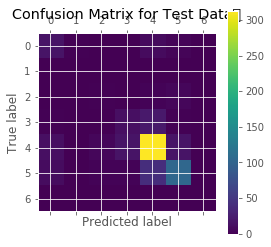

In [15]:
# KNN
accuracy_1 = accuracy_score(Y_test, predict_1)
print('\nAccuracy of KNN:\n')
print (accuracy_1)
conf_mat_1 = confusion_matrix(Y_test, predict_1)
print('\nConfusion Matrix: \n',conf_mat_1)
plt.matshow(conf_mat_1)
plt.title('Confusion Matrix for Test Data\t')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [16]:
from sklearn.neighbors import NearestCentroid

In [17]:
clf_2 = NearestCentroid()

In [18]:
clf_2.fit(train_tfmat.toarray(), Y_train)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [19]:
predict_2 = clf_2.predict(test_tfmat.toarray())


Accuracy of Rochio:

0.6967213114754098

Confusion Matrix: 
 [[ 21   0   1   4   0   7   0   1]
 [  0   0   0   0   0   0   0   0]
 [  0   0   7   1   3   1   0   0]
 [  0   2   1  18  14   4   0   0]
 [  3  46   1  19 264  30   0   0]
 [  2  18   3  11  12 115   0   0]
 [  0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0]]


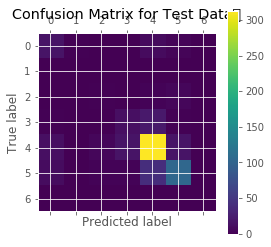

In [20]:
#Rocchio
accuracy_2 = accuracy_score(Y_test, predict_2)
print('\nAccuracy of Rochio:\n')
print (accuracy_2)
conf_mat_2 = confusion_matrix(Y_test, predict_2)
print('\nConfusion Matrix: \n',conf_mat_2)
plt.matshow(conf_mat_1)
plt.title('Confusion Matrix for Test Data\t')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()